# Decision Tree
Build a decison tree to predict the quality of github profiles

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import os

dp = os.environ.get('pub_data')

In [21]:
#Read dataset
data = pd.read_csv(dp + 'giteval.csv',index_col=0)
print(len(data))
data.head()

230


,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell', ...",10,1,437,0,0.25,6.15,3.5,4.5,4.0
1,0,0,0,1,0.00,[],0,0,1,159,0.00,0.00,0.0,0.0,0.0
2,12,1,182,0,-1.00,"['JavaScript', 'PHP', 'CSS', 'Ruby', 'Shell']",5,0,433,3,0.23,36.08,4.0,3.0,3.5
3,13,31,0,17,0.00,"['PHP', 'HTML', 'JavaScript']",3,0,20,0,0.50,1.54,2.0,2.0,2.0
4,99,344,370,16,23.12,"['C', 'JavaScript', 'Go', 'CMake', 'Jupyter No...",10,0,255,6,0.02,2.58,5.0,3.0,4.0


In [26]:
X = data[['repos','stars','followers','following','foll_ratio','n_lang','org_flag','n_cont','last_cont','stab_cont','cont_repo_ratio']]

# 将连续目标变量离散化为5个类别
bins = np.linspace(np.min(data['y']), np.max(data['y']), 6)
data['y_binned'] = np.digitize(data['y'], bins) - 1  # `np.digitize` 返回从1开始的索引，我们需要从0开始

# 提取特征和目标变量
X = data.drop(columns=['y', 'y_binned'])
y = data['y_binned']
# y = data['y']

# 使用 OneHotEncoder 对 lang 列进行独热编码
encoder = OneHotEncoder()
lang_encoded = encoder.fit_transform(X[['lang']]).toarray()
lang_encoded_df = pd.DataFrame(lang_encoded, columns=encoder.get_feature_names_out(['lang']))

# 将独热编码结果与原数据框连接起来，并移除原 lang 列
X = pd.concat([X.drop(columns=['lang']), lang_encoded_df], axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30,random_state = 100)

In [28]:
# Fitting the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       0.80      0.67      0.73         6
           3       0.67      0.80      0.73         5
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1

    accuracy                           0.83        30
   macro avg       0.66      0.66      0.66        30
weighted avg       0.84      0.83      0.83        30



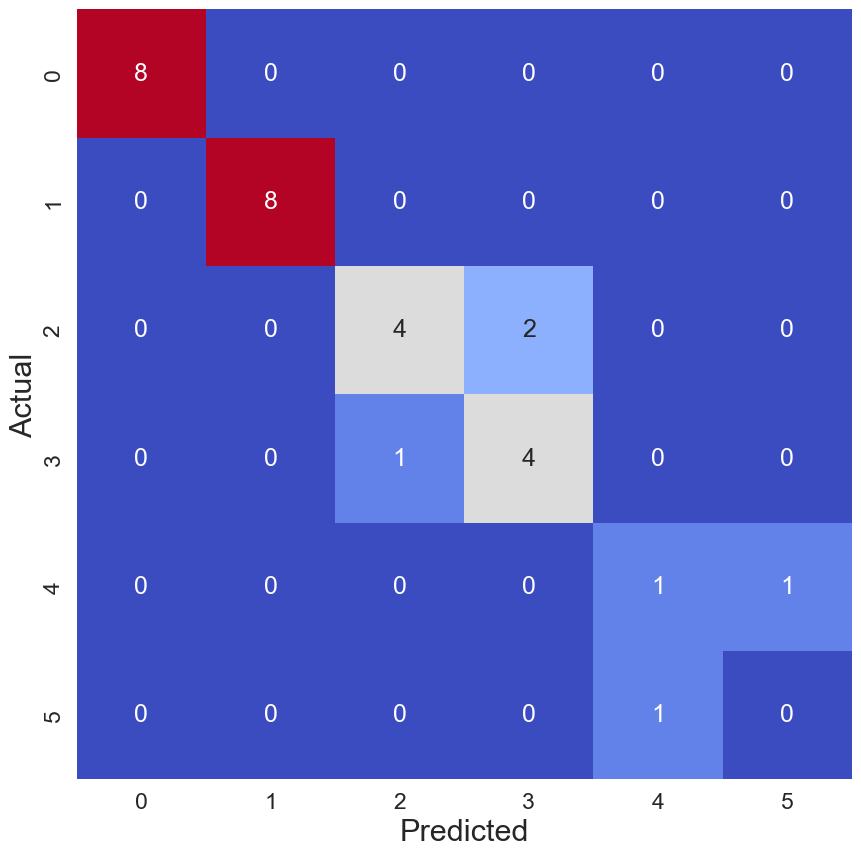

In [29]:
# Prediction and evaluation
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

#Create confusion matrix
lang = [0, 1, 2, 3, 4, 5]
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,columns=lang,index=lang)

#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

plt.savefig('../../../figures/model_eval.png',format='png',dpi=150)